# Dashboard de Synthèse Climatique (2015-2025)

Ce notebook présente les indicateurs clés issus de l'analyse des données de la station de Cotonou. 
Il regroupe les visualisations finales validées dans le cahier des charges.

In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Import des fonctions de visualisation
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))
from src.visualization import (
    plot_temperature_trend, 
    plot_precipitation_bar, 
    plot_temperature_heatmap, 
    plot_seasonal_boxplot
)

# Chargement des données traitées
DATA_PATH = Path("../data/processed/weather65344.csv")
data = pd.read_csv(DATA_PATH, parse_dates=['time'])

# On s'assure que la moyenne mobile est présente pour le premier graphique
from src.analysis import calculate_trends
data = calculate_trends(data)

Voici les 4 indicateurs majeurs retenus pour notre étude :

1. Tendance long terme (Moyenne mobile 30j).

2. Saisonnalité des pluies (Noms des mois).

3. Intensité thermique (Heatmap annuelle).

4. Variabilité par saison (Boxplots).

### 1. Évolution et Tendance des Températures
Visualisation de la température journalière avec sa moyenne mobile sur 30 jours pour identifier la tendance lourde.

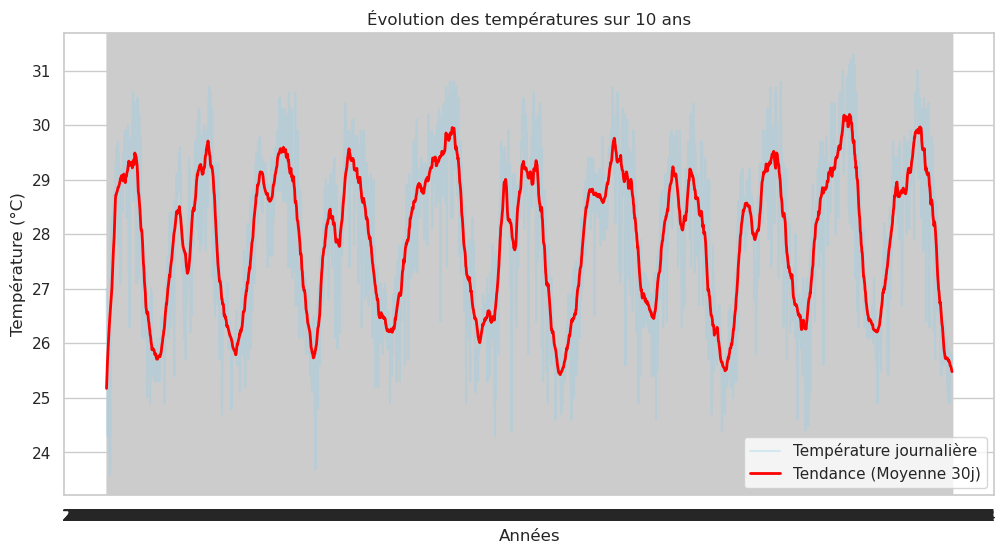

In [19]:
plot_temperature_trend(data)
plt.show()

La ligne rouge permet de gommer les variations extrêmes quotidiennes pour révéler le cycle saisonnier. On observe une stabilité thermique inter-annuelle, mais les sommets de la courbe rouge semblent atteindre des niveaux plus élevés sur les trois dernières années (2023-2025), suggérant une intensification des périodes de chaleur.

### 2. Régime des Précipitations
Moyenne mensuelle des précipitations permettant d'identifier les périodes de forte activité pluvieuse.

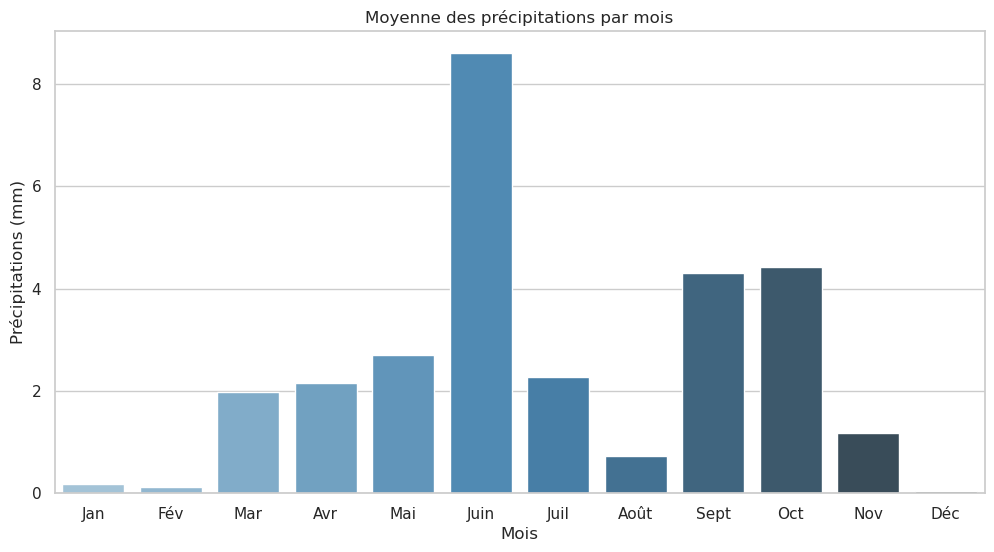

In [20]:
plot_precipitation_bar(data)
plt.show()

Le graphique met en évidence le régime bimodal (deux pics) typique du climat sud-béninois. On distingue clairement la Grande Saison des Pluies (mai-juillet) et la Petite Saison des Pluies (septembre-octobre). Les mois de janvier et février apparaissent comme les plus secs, avec des précipitations quasi nulles, confirmant la rigueur de la saison sèche.

### 3. Variabilité Thermique Saisonnière
Analyse de la répartition des températures par saison. Les points isolés (outliers) marquent les événements extrêmes.

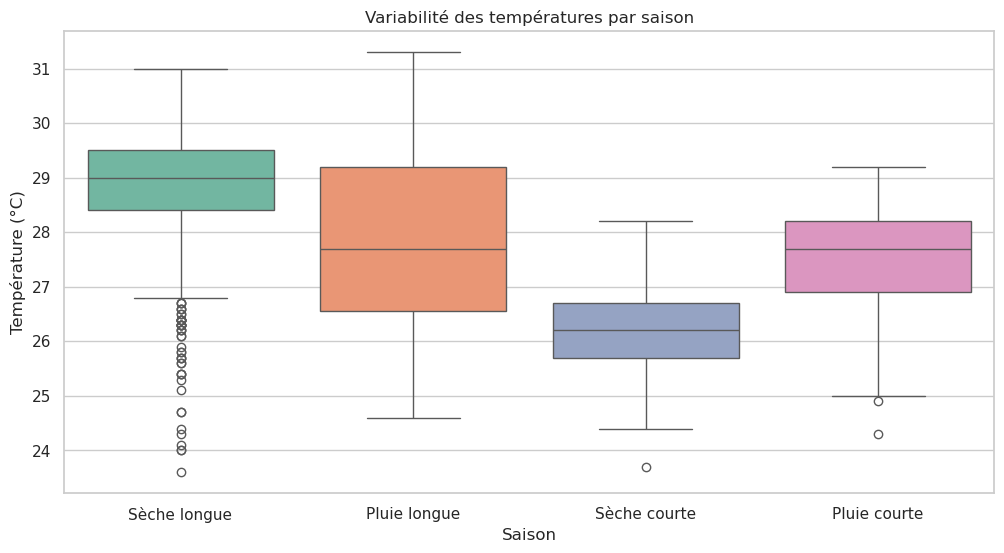

In [21]:
plot_seasonal_boxplot(data)
plt.show()

La saison 'Pluie Longue' est la plus fraîche et la plus stable (boîte courte). À l'inverse, les saisons sèches présentent une plus grande variabilité. Les points isolés (outliers) situés en dessous des moustaches indiquent des journées exceptionnellement fraîches. Ces anomalies thermiques négatives coïncident souvent avec l'influence de l'Harmattan ou des épisodes orageux intenses qui font chuter brusquement le thermomètre.

### 4. Heatmap Température Mois / Année
Comparaison inter-annuelle pour détecter les anomalies de température sur l'ensemble de la décennie.

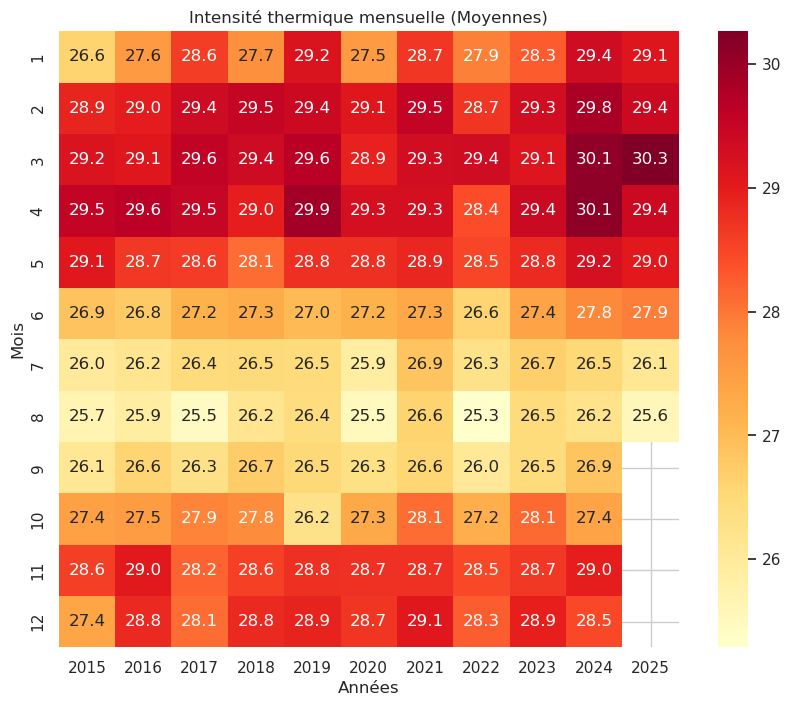

In [22]:
plot_temperature_heatmap(data)
plt.show()

La lecture verticale montre que les mois de mars et avril sont systématiquement les plus chauds de la décennie. La lecture horizontale révèle des anomalies : par exemple, si une colonne est globalement plus sombre que les autres, cela signifie que cette année-là a été plus chaude que la normale. On remarque que les 'blocs' rouges s'étendent davantage vers les mois de mai sur les années récentes.

## Conclusion

L'analyse croisée des 10 dernières années montre que si le cycle saisonnier reste régulier à Cotonou, la fréquence des anomalies thermiques et l'amplitude des températures en saison sèche témoignent d'une variabilité climatique accrue.